Xây dựng Feature => Thêm, bớt, thay đổi
Deployment? ML Flow


In [53]:
import numpy as np
from collections import defaultdict
from scripts.data import ClassicPagedData
import os
pagedData=ClassicPagedData(os.path.join(os.getcwd(),"data/train"))
print(f"Number of sessions: {len(pagedData)}")
print(f"Batch size: {pagedData.BATCHSIZE}")

Number of sessions: 12899779
Batch size: 20000


In [5]:
histArr=[len(session["events"]) for session in pagedData]

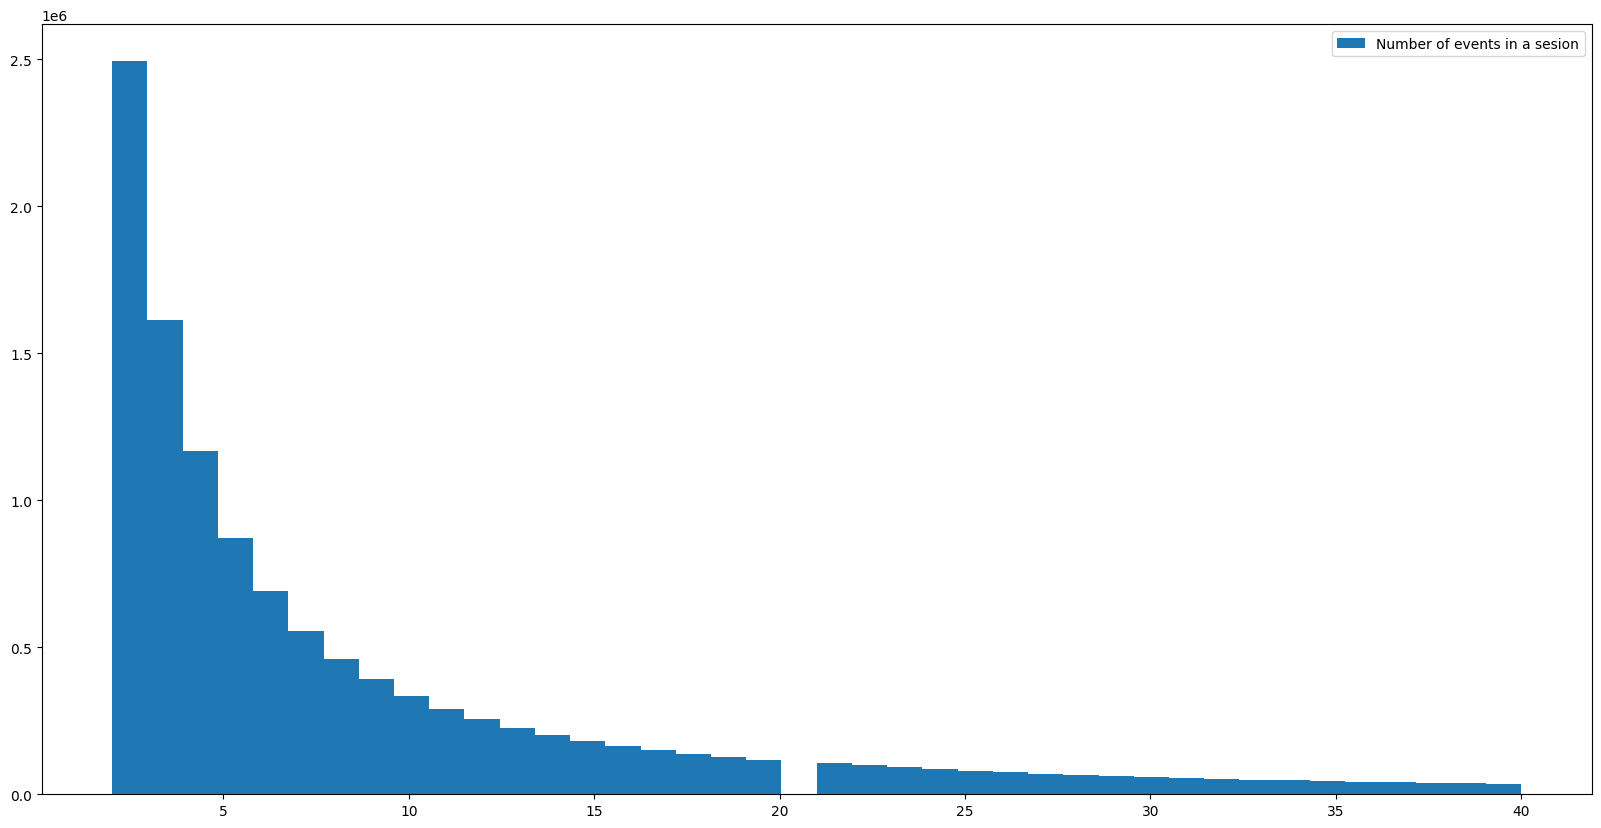

In [31]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (20, 10))
counts,_,bars=plt.hist(
    x=[x for x in histArr if x<41],
    bins=40,
    label="Number of events in a sesion",
    density=False
    )
# plt.bar_label(bars)
plt.legend()
plt.show()
    

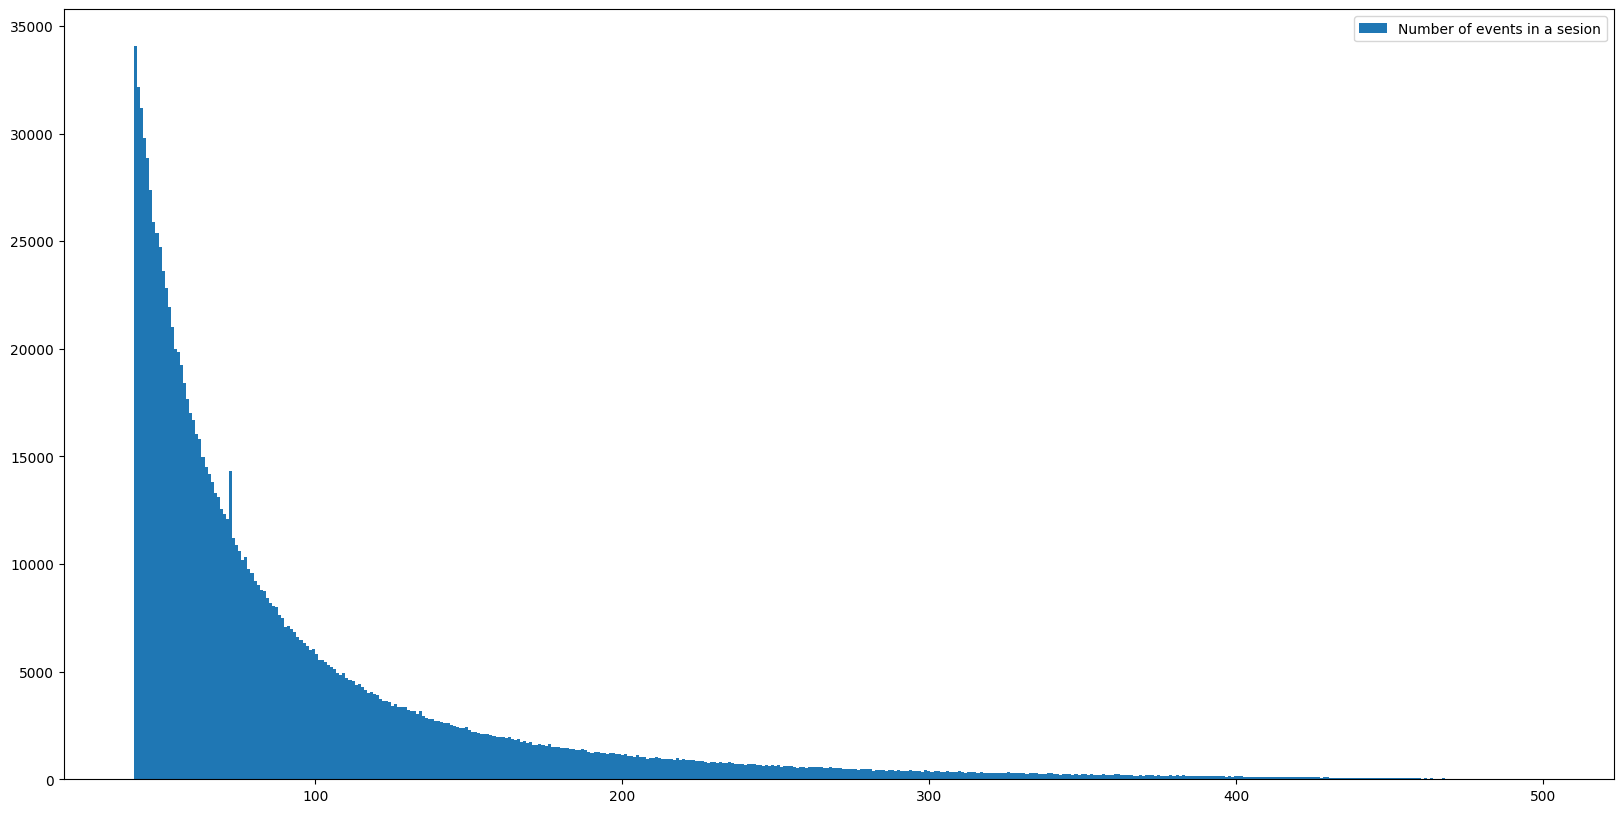

In [32]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (20, 10))
counts,_,bars=plt.hist(
    x=[x for x in histArr if x>=41],
    bins=460,
    label="Number of events in a sesion",
    density=False
    )
# plt.bar_label(bars)
plt.legend()
plt.show()

/tmp/ipykernel_34045/1882104670.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  counted_pctchange=counted.reindex(index=range(_min,_max+1)).fillna(method='ffill').reset_index().pct_change().reset_index()


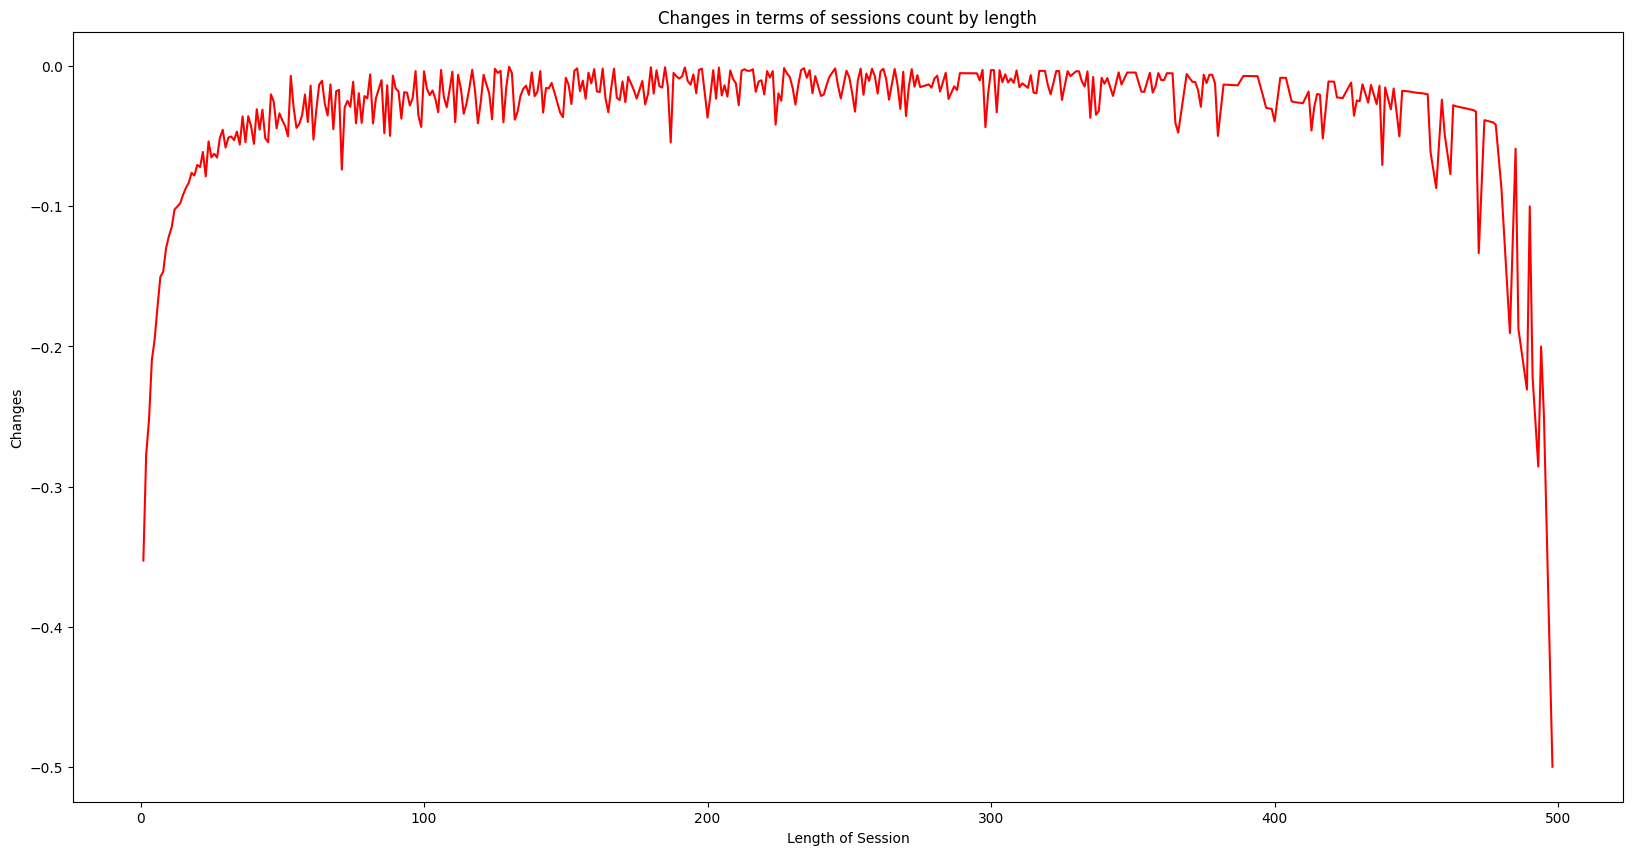

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
counted=pd.DataFrame({"Len":histArr}).value_counts().to_frame().reset_index()
_max=max(counted.index)
_min=min(counted.index)
counted_pctchange=counted.reindex(index=range(_min,_max+1)).fillna(method='ffill').reset_index().pct_change().reset_index()
counted_pctchange=counted_pctchange.loc[counted_pctchange["count"]!=0]
fig,ax = plt.subplots(figsize = (20, 10))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot(counted_pctchange.index, counted_pctchange["count"],color="red") 
plt.xlabel("Length of Session") 
plt.ylabel("Changes") 
plt.title("Changes in terms of sessions count by length") 
plt.show() 